## Explain the XGBOOST model through SHAP


Training Set - R2 Score 0.9835559024689836
Training Set - std R2 Score 0.002723001796083249
Training Set - RMSE 0.017134405459031832
Training Set - std RMSE Score 0.0013589932254030285
Training Set - MAE 0.01390726305930646
Training Set - std MAE Score 0.0011531836719967552
Test Set - R2 Score 0.8536746111862488
Test Set - std R2 Score 0.06578922541146985
Test Set - RMSE 0.046842383739173515
Test Set - std RMSE Score 0.007018842921432217
Test Set - MAE 0.03853003627127344
Test Set - std MAE Score 0.005548395962028339


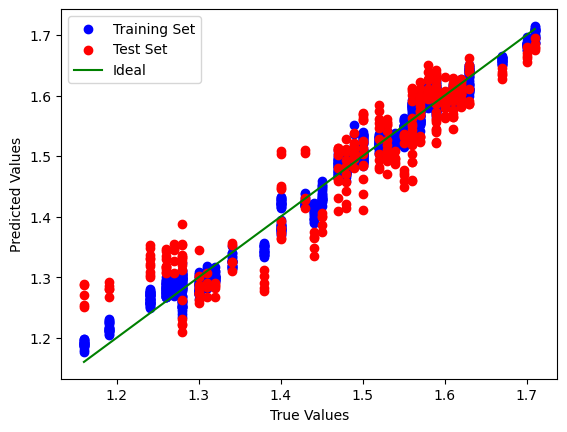

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder

# Load data from Excel file
data = pd.read_excel('Total_data.xlsx',sheet_name='Sheet2')


X = data.iloc[:, :5]   
y = data.iloc[:, 5]    
feature_names = ['x1', 'x2', 'x3', 'x4', 'x5']

# Initialize XGBoost Regressor
# xgb = XGBRegressor(
#     max_depth=5,
#     learning_rate=0.10,
#     n_estimators=240,
#     reg_lambda=5,
#     reg_alpha=0.01,
#     min_child_weight=3,
#     subsample=0.8,
#     colsample_bytree=0.5
# )
xgb = XGBRegressor(max_depth=5, learning_rate=0.10, n_estimators=240,
                       reg_lambda=10, reg_alpha=0, min_child_weight=3,
                       subsample=0.8, colsample_bytree=0.6)

# Define number of repeated cross-validation loops and folds
num_repeats = 5
num_folds = 5

# Initialize lists to store evaluation metrics
all_r2_train = []
all_rmse_train = []
all_mae_train = []
all_r2_test = []
all_rmse_test = []
all_mae_test = []
all_y_train = []
all_y_train_pred = []
all_y_test = []
all_y_test_pred = []
all_x_train = []
all_x_test = []

model_rf_results = []

# K-repeated K-Fold Cross Validator
for i in range(num_repeats):

    
    cv = KFold(n_splits=num_folds, shuffle=True, random_state=i)

    
    for train_index, test_index in cv.split(X, y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = xgb.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)

        y_test_pred = model.predict(X_test)

        all_y_train.append(y_train)
        all_y_train_pred.append(y_train_pred)
        all_y_test.append(y_test)
        all_y_test_pred.append(y_test_pred)
        all_x_train.append(X_train)
        all_x_test.append(X_test)

        # Calculate evaluation metrics
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)

        all_r2_train.append(r2_train)
        all_rmse_train.append(rmse_train)
        all_mae_train.append(mae_train)
        all_r2_test.append(r2_test)
        all_rmse_test.append(rmse_test)
        all_mae_test.append(mae_test)

# Calculate mean and standard deviation of evaluation metrics
mean_r2_train = np.mean(all_r2_train)
std_r2_train = np.std(all_r2_train)
mean_rmse_train = np.mean(all_rmse_train)
std_rmse_train = np.std(all_rmse_train)
mean_mae_train = np.mean(all_mae_train)
std_mae_train = np.std(all_mae_train)

mean_r2_test = np.mean(all_r2_test)
std_r2_test = np.std(all_r2_test)
mean_rmse_test = np.mean(all_rmse_test)
std_rmse_test = np.std(all_rmse_test)
mean_mae_test = np.mean(all_mae_test)
std_mae_test = np.std(all_mae_test)

print("\nTraining Set - R2 Score", mean_r2_train)
print("Training Set - std R2 Score", std_r2_train)
print("Training Set - RMSE", mean_rmse_train)
print("Training Set - std RMSE Score", std_rmse_train)
print("Training Set - MAE", mean_mae_train)
print("Training Set - std MAE Score", std_mae_train)
print("Test Set - R2 Score", mean_r2_test)
print("Test Set - std R2 Score", std_r2_test)
print("Test Set - RMSE", mean_rmse_test)
print("Test Set - std RMSE Score", std_rmse_test)
print("Test Set - MAE", mean_mae_test)
print("Test Set - std MAE Score", std_mae_test)


# Plot predicted vs true values
y_train_combined = np.concatenate(all_y_train)
y_train_pred_combined = np.concatenate(all_y_train_pred)
y_test_combined = np.concatenate(all_y_test)
y_test_pred_combined = np.concatenate(all_y_test_pred)
x_test_combined = np.concatenate(all_x_test)
x_train_combined = np.concatenate(all_x_train)
plt.scatter(y_train_combined, y_train_pred_combined, color='blue', label='Training Set')
plt.scatter(y_test_combined, y_test_pred_combined, color='red', label='Test Set')
plt.plot([min(y_train_combined), max(y_train_combined)], [min(y_train_combined), max(y_train_combined)], color='green', label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# 相关性矩阵计算



Pearson Correlation Matrix:
          x1        x2        x3        x4        x5        y1
x1  1.000000  0.114094  0.059650  0.090897 -0.339596 -0.155723
x2  0.114094  1.000000  0.085439  0.036903  0.017504  0.012005
x3  0.059650  0.085439  1.000000 -0.290976 -0.212780 -0.157576
x4  0.090897  0.036903 -0.290976  1.000000 -0.004631 -0.120154
x5 -0.339596  0.017504 -0.212780 -0.004631  1.000000  0.529199
y1 -0.155723  0.012005 -0.157576 -0.120154  0.529199  1.000000

Spearman Correlation Matrix:
          x1        x2        x3        x4        x5        y1
x1  1.000000  0.066507 -0.050660  0.071645 -0.280350 -0.144475
x2  0.066507  1.000000  0.082635  0.058844  0.029310  0.094717
x3 -0.050660  0.082635  1.000000 -0.265368 -0.204862 -0.064405
x4  0.071645  0.058844 -0.265368  1.000000 -0.019751 -0.166118
x5 -0.280350  0.029310 -0.204862 -0.019751  1.000000  0.495300
y1 -0.144475  0.094717 -0.064405 -0.166118  0.495300  1.000000

Kendall Correlation Matrix:
          x1        x2        

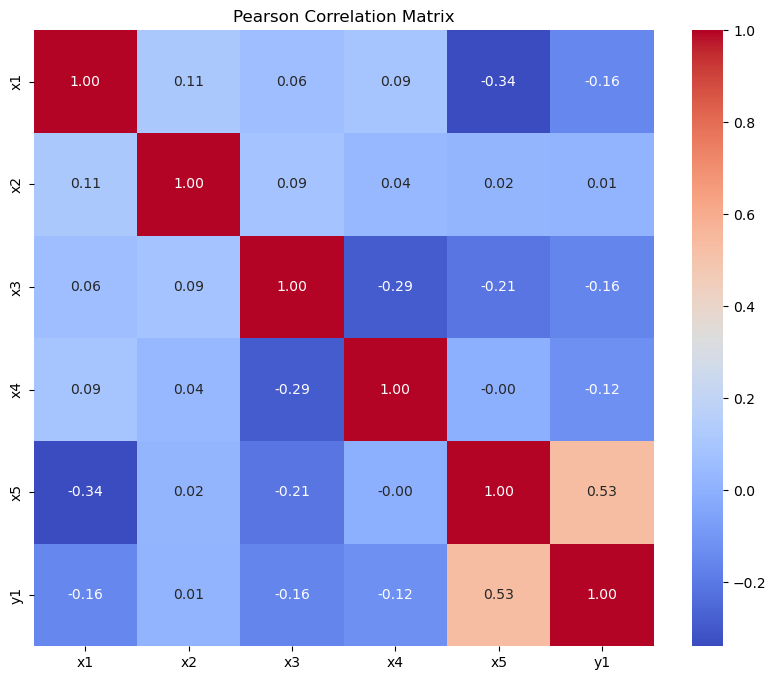

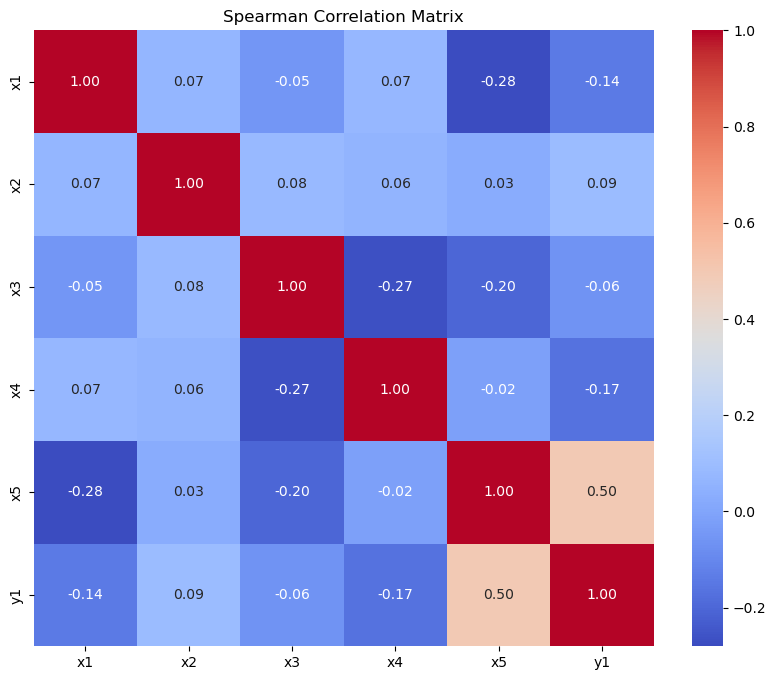

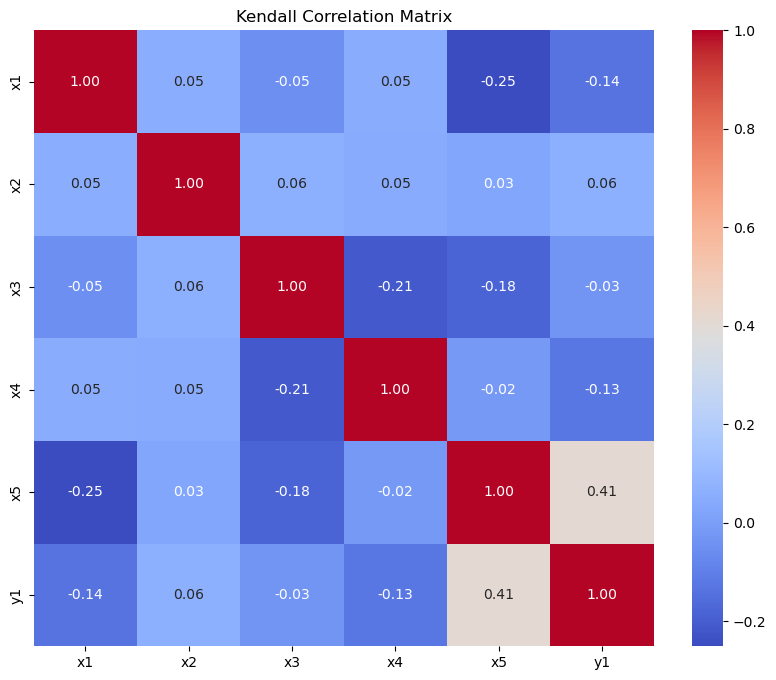

In [3]:
# 计算 Pearson 相关系数矩阵
pearson_corr = data.corr(method='pearson')

# 计算 Spearman 秩相关系数矩阵
spearman_corr = data.corr(method='spearman')

# 计算 Kendall 秩相关系数矩阵
kendall_corr = data.corr(method='kendall')

# 打印结果
print("\nPearson Correlation Matrix:")
print(pearson_corr)

print("\nSpearman Correlation Matrix:")
print(spearman_corr)

print("\nKendall Correlation Matrix:")
print(kendall_corr)

import seaborn as sns
import matplotlib.pyplot as plt

# 可视化 Pearson 相关系数矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

# 可视化 Spearman 相关系数矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix')
plt.show()

# 可视化 Kendall 相关系数矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Kendall Correlation Matrix')
plt.show()

# SHAP可视化分析

In [3]:

xgb = XGBRegressor(max_depth=5, learning_rate=0.10, n_estimators=240,
                       reg_lambda=10, reg_alpha=0, min_child_weight=3,
                       subsample=0.8, colsample_bytree=0.6)
model=xgb.fit(X, y)

In [6]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=3,min_samples_leaf=2,random_state=1)
model=rf.fit(X,y)

e:\anaconda3\envs\fractal\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


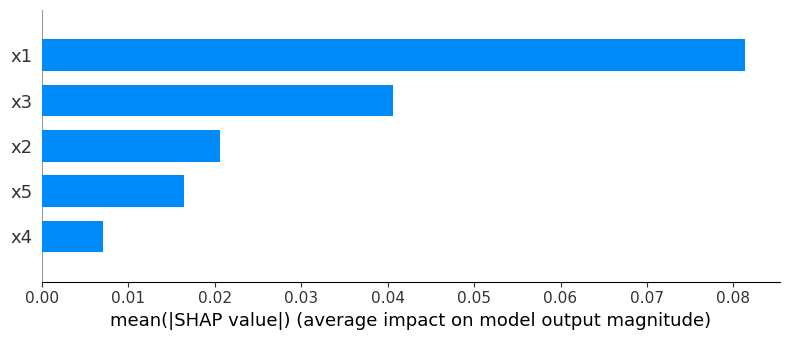

In [4]:
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl

# Initialize JavaScript visualization for SHAP in Jupyter Notebook
shap.initjs()

# Create a model explainer using TreeExplainer
explainer = shap.TreeExplainer(model)

# Compute SHAP values for the entire dataset
shap_values = explainer.shap_values(X)
expected_value = np.array([explainer.expected_value])

# Convert shap_values into a SHAP Explanation object (optional, for advanced usage)
shap_exp = shap.Explanation(values=shap_values, data=X)

# Generate and display a summary plot of feature importances using bar chart
shap.summary_plot(shap_values, X, feature_names=feature_names, plot_type="bar")

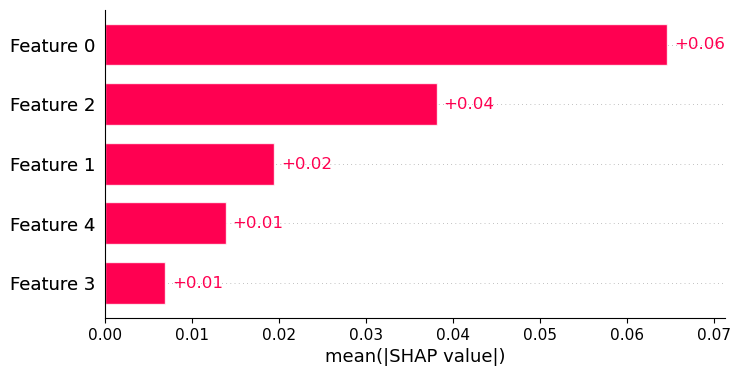

In [22]:
shap.plots.bar(shap_exp)

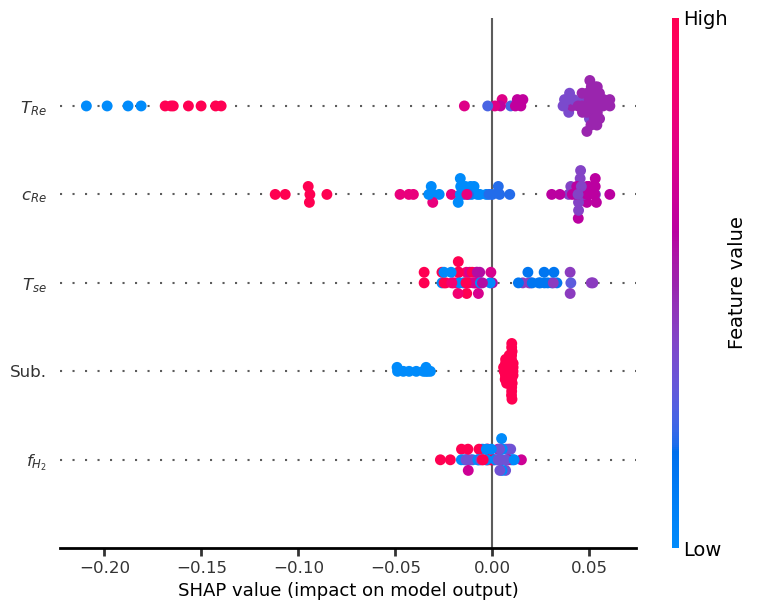

In [4]:
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
src_names = ['$T_{Re}$', '$T_{se}$', '$c_{Re}$', '$f_{H_2}$','Sub.']
# 生成Beeswarm图
shap.summary_plot(shap_values, X, feature_names=src_names, plot_size=(8, 6.2), show=False)


fig = plt.gcf()
ax = fig.axes[0]

for child in ax.get_children():
    if isinstance(child, Line2D):
        
        child.set_linewidth(1.5)      
        # child.set_linestyle('-')  
        child.set_alpha(0.8)       
        child.set_color('#333333') 
for child in ax.get_children():
    if isinstance(child, mpl.collections.PathCollection):
        child.set_linewidths(1.5)  
        child.set_sizes([40])      


for spine in ax.spines.values():
    spine.set_linewidth(2)        
plt.tick_params(axis='both', width=2, length=6, labelsize=12)

if len(fig.axes) > 1:
    cb_ax = fig.axes[1]
    cb_ax.tick_params(labelsize=14)
    cb_ax.set_ylabel("Feature value", fontsize=14)

plt.tight_layout()
plt.show()

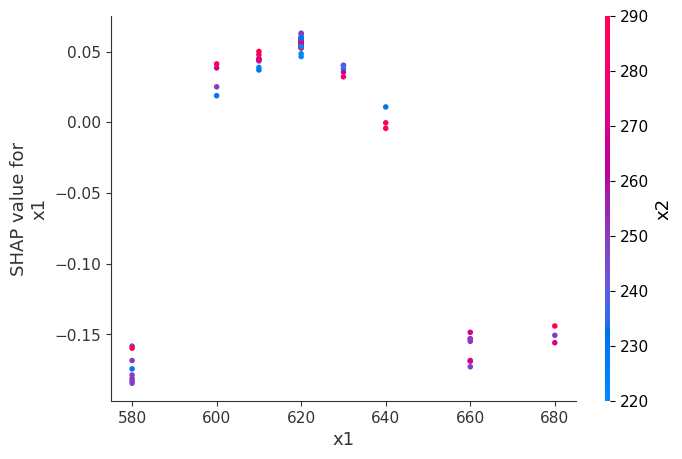

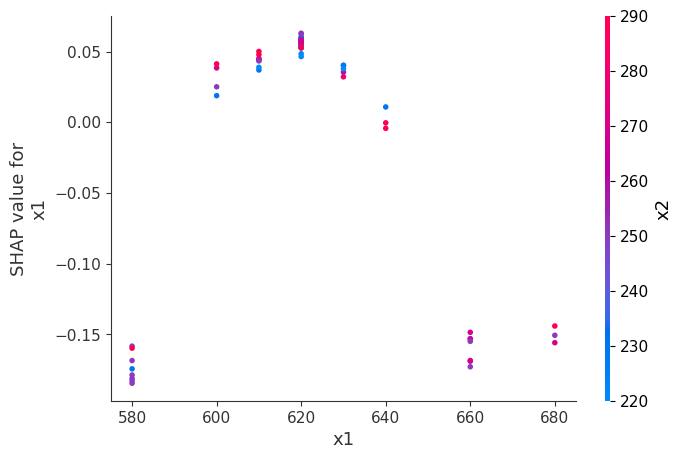

In [17]:
# 计算 SHAP 值
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# 绘制 x1 的依赖图，并自动选择对预测影响最大的交互特征
shap.dependence_plot("x1", shap_values, X)

# 或者指定和 x2 的交互
shap.dependence_plot("x1", shap_values, X, interaction_index="x2")

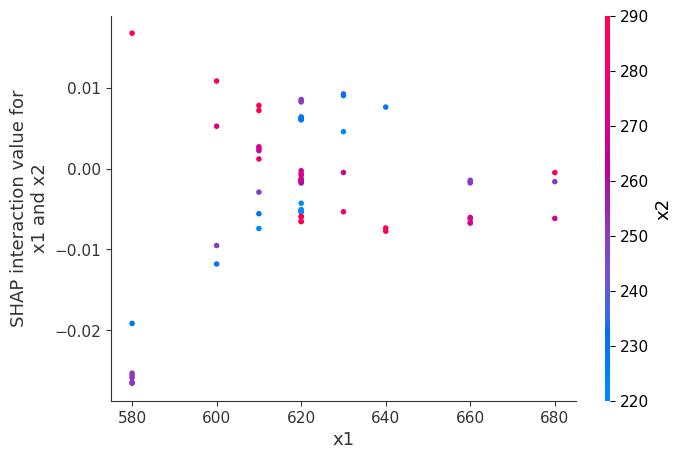

In [ ]:

# 计算 SHAP 交互值
          
shap_interaction_values = explainer.shap_interaction_values(X)  
          
  
shap.dependence_plot(("x1", "x2"), shap_interaction_values, X, show=False)

          
plt.show()



Shape of SHAP interaction values: (69, 5, 5)

SHAP Interaction Values for First Sample:
          x1        x2        x3        x4        x5
x1 -0.163773 -0.013932  0.014897 -0.006401  0.006564
x2 -0.013932  0.035056 -0.002328 -0.001524 -0.000081
x3  0.014897 -0.002328 -0.097270  0.001575  0.002853
x4 -0.006401 -0.001524  0.001575  0.000438 -0.001446
x5  0.006564 -0.000081  0.002853 -0.001446 -0.037346

Model prediction for first sample: 1.2255619
Mean prediction + sum of SHAP interaction values: 1.22791
[[-1.24013916e-01 -3.29590775e-02 -8.40988085e-02 -2.67684888e-02
  -3.17732021e-02]
 [-1.62645116e-01  1.71915237e-02 -8.02739933e-02 -7.35823577e-03
  -2.94565987e-02]
 [-1.87537327e-01  8.03821348e-03 -4.25285138e-02 -1.70480367e-02
   9.10990126e-03]
 [-1.86911955e-01  9.47084930e-03 -3.18000540e-02 -6.67688018e-03
   7.26294192e-03]
 [-1.48127824e-01  1.44099183e-02 -2.65488159e-02 -1.36280926e-02
  -3.77482511e-02]
 [-1.42231092e-01  1.96078867e-02 -3.33830975e-02 -1.22063858e-02

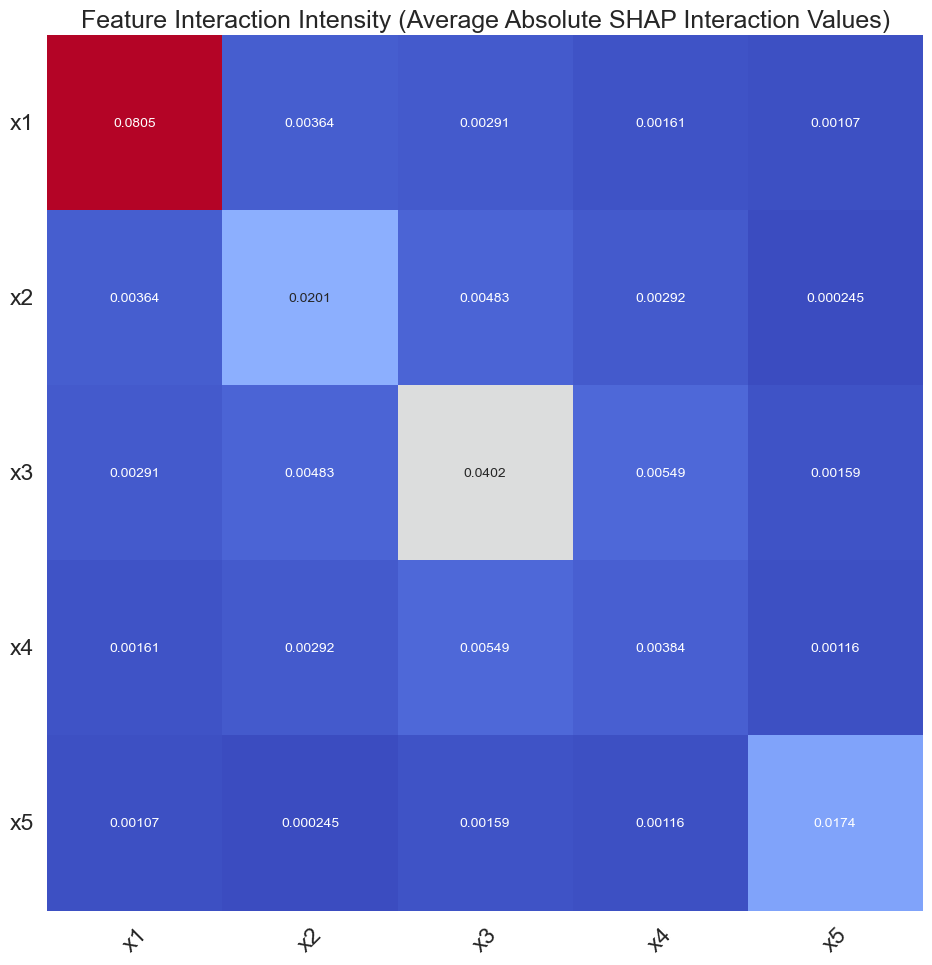

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shap import TreeExplainer

# 假设你已经训练好了模型 `model`，并且有特征数据 `X`

# Step 1: 获取 SHAP 解释器和 SHAP 交互值
explainer = TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(X)

# Step 2: 查看 SHAP 交互值形状 (样本数, 特征数, 特征数)
print("Shape of SHAP interaction values:", np.shape(shap_interaction))

# Step 3: 查看第一个样本的 SHAP 交互值矩阵
interaction_df = pd.DataFrame(shap_interaction[1], index=X.columns, columns=X.columns)
print("\nSHAP Interaction Values for First Sample:")
print(interaction_df)

# Step 4: 获取模型预测结果
y_pred = model.predict(X)

# 计算平均预测值
mean_pred = np.mean(y_pred)

# 对于第一个样本，计算其 SHAP 交互值总和
sum_shap = np.sum(shap_interaction[1])

# 验证：模型预测 ≈ 平均预测 + SHAP交互值总和
print("\nModel prediction for first sample:", y_pred[1])
print("Mean prediction + sum of SHAP interaction values:", mean_pred + sum_shap)

# ✅ 新增部分：验证 SHAP 值 = 主效应 + 交互效应

# 获取普通的 SHAP 值（不带交互）
shap_values = explainer.shap_values(X)
print(shap_values)
# 提取主效应（对角线元素）
main_effects = np.diagonal(shap_interaction, axis1=1, axis2=2)  # shape: (n_samples, n_features)

# 提取交互效应：所有非对角项求和（即每个特征与其他特征的交互之和）
interaction_effects = shap_interaction.sum(axis=2) - main_effects  # 减去对角线

# 总 SHAP 值 = 主效应 + 交互效应
shap_total_calculated = main_effects + interaction_effects

# 验证：计算出的总 SHAP 是否等于直接获取的 SHAP 值
is_equal = np.allclose(shap_total_calculated, shap_values, atol=1e-6)

print("\n✅ 验证结果：")
if is_equal:
    print("SHAP 值确实等于主效应 + 所有交互效应之和（精确相等）")
else:
    print("存在差异，可能由于精度问题或模型类型不兼容")

# 可选：查看前几个样本的比较
print("\nSample comparison (first 5 samples):")
comparison = pd.DataFrame({
    'Original SHAP': shap_values[0],
    'Calculated SHAP': shap_total_calculated[0]
})
print(comparison.head())

# Step 5: 计算每个特征对之间平均绝对交互值
mean_shap = np.abs(shap_interaction).mean(axis=0)  # shape: (n_features, n_features)

# 构建 DataFrame 显示平均交互强度
df_interactions = pd.DataFrame(mean_shap, index=X.columns, columns=X.columns)

# 注意：非对角线元素表示两个特征之间的交互作用
# 因为 (i,j) 和 (j,i) 是相同的交互，所以通常只保留一个，或乘以2来合并
# 下面这行将非对角线元素乘以2，避免低估交互效应
df_interactions = df_interactions.where(
    np.eye(df_interactions.shape[0], dtype=bool),  # 对角线保持不变
    df_interactions.values                      # 非对角线
)

print("\nFeature Interaction Matrix (Average Absolute SHAP Interaction Values):")
print(df_interactions)

# Step 6: 绘制交互强度热力图
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)
sns.heatmap(
    df_interactions,
    cmap='coolwarm',
    annot=True,
    fmt='.3g',
    cbar=False,
    square=True,
    annot_kws={"size": 10}
)
plt.title("Feature Interaction Intensity (Average Absolute SHAP Interaction Values)")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 假设 'src_names' 中的第一个特征是 '$T_{Re}$'
feature_idx = 2  # '$T_{Re}$' 在特征列表中的索引

# 提取该特征在所有样本上的 SHAP 值
x0_shap = shap_values[:, feature_idx]

# 计算最大和最小值
max_shap = np.max(x0_shap)
min_shap = np.min(x0_shap)

print(f"特征 $C_{{Re}}$ 的最大 SHAP 值: {max_shap:.4f}")
print(f"特征 $C_{{Re}}$ 的最小 SHAP 值: {min_shap:.4f}")

In [33]:
# Correct force plot call for a single instance
shap.force_plot(expected_value, shap_values, shap_values)


In [48]:
# 如果你只想解释一个特定的数据点，可以只计算该点的 SHAP 值
i=0
shap_values_single = explainer.shap_values(X.iloc[[i]])
shap.force_plot(expected_value[0], shap_values_single, X.iloc[i], feature_names=X.columns.tolist())

In [50]:
shap.plots.scatter(shap_values[:,"x1"], color=shap_values[:,"x4"])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

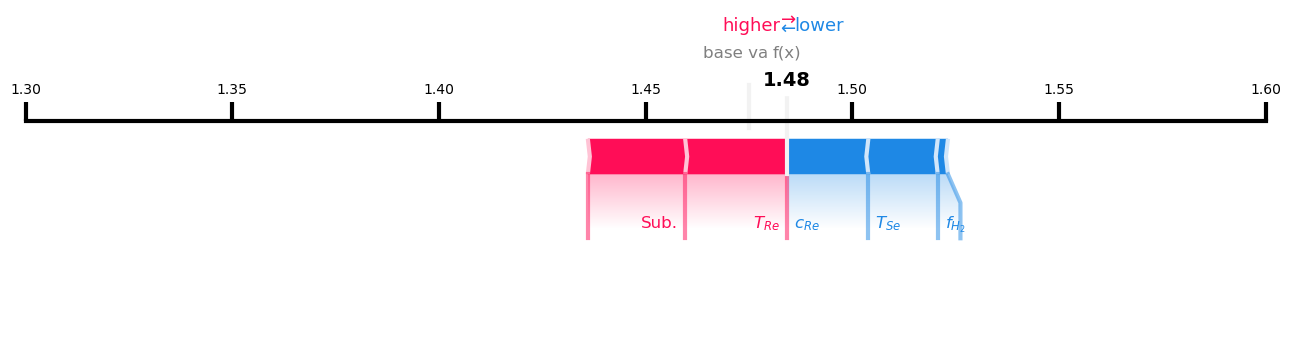

In [49]:
shap.initjs()
src_names = ['$T_{Re}$', '$T_{Se}$', '$c_{Re}$', '$f_{H_2}$','Sub.']
i=25 # 1,25,88
shap.plots.force(explainer.expected_value, shap_values[i,:], feature_names=src_names , 
                 link='identity', plot_cmap='RdBu', matplotlib=True, show=False, figsize=(16, 3), 
                 ordering_keys=None, ordering_keys_time_format=None, text_rotation=0, 
                 contribution_threshold=0.05)
n=3
fig, ax = plt.gcf(), plt.gca()
for line in ax.lines:
    line.set_linewidth(n)

ax.set_xlim(1.30, 1.60)

plt.tick_params(axis='both',width=n,length=14)
ax.spines['top'].set_linewidth(n)

mpl.rcParams['font.size'] =25
mpl.rcParams['font.family'] = 'Arial'
# mpl.rcParams['mathtext.default'] = 'regular'
mpl.rcParams['mathtext.default'] = 'it'

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import shap  # 引入 SHAP 库

# Load data from Excel file
data = pd.read_excel('Total_data.xlsx')

X = data.iloc[:, :5]   
y = data.iloc[:, 5]    
feature_names = ['x1', 'x2', 'x3', 'x4', 'x5']

# Initialize XGBoost Regressor
xgb = XGBRegressor(
    max_depth=5,
    learning_rate=0.10,
    n_estimators=220,
    reg_lambda=5,
    reg_alpha=0.01,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.5
)

# Define number of repeated cross-validation loops and folds
num_repeats = 10
num_folds = 10

# Initialize lists to store evaluation metrics
all_r2_train = []
all_rmse_train = []
all_mae_train = []
all_r2_test = []
all_rmse_test = []
all_mae_test = []
all_y_train = []
all_y_train_pred = []
all_y_test = []
all_y_test_pred = []
all_x_train = []
all_x_test = []

# 初始化列表来保存 SHAP 值和特征值
all_shap_values = []
all_X_for_shap = []

# K-repeated K-Fold Cross Validator
for i in range(num_repeats):
    cv = KFold(n_splits=num_folds, shuffle=True, random_state=i)
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = xgb.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        all_y_train.append(y_train)
        all_y_train_pred.append(y_train_pred)
        all_y_test.append(y_test)
        all_y_test_pred.append(y_test_pred)
        all_x_train.append(X_train)
        all_x_test.append(X_test)

        # Calculate evaluation metrics
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)

        all_r2_train.append(r2_train)
        all_rmse_train.append(rmse_train)
        all_mae_train.append(mae_train)
        all_r2_test.append(r2_test)
        all_rmse_test.append(rmse_test)
        all_mae_test.append(mae_test)

        # SHAP 分析部分
        explainer = shap.Explainer(model)
        shap_values = explainer(X_test)  # 可以改为 X_train 或全部数据

        all_shap_values.append(shap_values.values)  # 保存 SHAP 值
        all_X_for_shap.append(X_test.values)        # 保存对应的原始输入

# Calculate mean and standard deviation of evaluation metrics
mean_r2_train = np.mean(all_r2_train)
std_r2_train = np.std(all_r2_train)
mean_rmse_train = np.mean(all_rmse_train)
std_rmse_train = np.std(all_rmse_train)
mean_mae_train = np.mean(all_mae_train)
std_mae_train = np.std(all_mae_train)

mean_r2_test = np.mean(all_r2_test)
std_r2_test = np.std(all_r2_test)
mean_rmse_test = np.mean(all_rmse_test)
std_rmse_test = np.std(all_rmse_test)
mean_mae_test = np.mean(all_mae_test)
std_mae_test = np.std(all_mae_test)

print("\nTraining Set - R2 Score", mean_r2_train)
print("Training Set - std R2 Score", std_r2_train)
print("Training Set - RMSE", mean_rmse_train)
print("Training Set - std RMSE Score", std_rmse_train)
print("Training Set - MAE", mean_mae_train)
print("Training Set - std MAE Score", std_mae_train)
print("Test Set - R2 Score", mean_r2_test)
print("Test Set - std R2 Score", std_r2_test)
print("Test Set - RMSE", mean_rmse_test)
print("Test Set - std RMSE Score", std_rmse_test)
print("Test Set - MAE", mean_mae_test)
print("Test Set - std MAE Score", std_mae_test)

# Plot predicted vs true values
y_train_combined = np.concatenate(all_y_train)
y_train_pred_combined = np.concatenate(all_y_train_pred)
y_test_combined = np.concatenate(all_y_test)
y_test_pred_combined = np.concatenate(all_y_test_pred)

plt.scatter(y_train_combined, y_train_pred_combined, color='blue', label='Training Set')
plt.scatter(y_test_combined, y_test_pred_combined, color='red', label='Test Set')
plt.plot([min(y_train_combined), max(y_train_combined)], [min(y_train_combined), max(y_train_combined)], color='green', label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('True vs Predicted Values')
plt.show()

# 合并所有 SHAP 值和对应特征
combined_shap_values = np.concatenate(all_shap_values, axis=0)
combined_X = np.concatenate(all_X_for_shap, axis=0)

# 平均绝对 SHAP 值用于排序特征重要性
mean_abs_shap = np.mean(np.abs(combined_shap_values), axis=0)
sorted_idx = np.argsort(mean_abs_shap)[::-1]
print("\nMean Absolute SHAP Values (Feature Importance):")
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {mean_abs_shap[idx]:.4f}")

# SHAP summary plot
shap.summary_plot(combined_shap_values, combined_X, feature_names=feature_names)

# 单个样本的 SHAP force plot 示例
shap.initjs()
shap.force_plot(explainer.expected_value, combined_shap_values[0], combined_X[0], feature_names=feature_names)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import shap

from sklearn.datasets import load_diabetes

# 加载糖尿病数据集（完全内置，无需联网）
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target
feature_names = diabetes.feature_names



print("数据集前5行：")
print(X.head())

# 初始化模型
model = XGBRegressor(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.7,
    random_state=42
)

# 设置交叉验证参数
num_folds = 5
cv = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# 存储评估指标和预测值
all_y_test = []
all_y_test_pred = []
all_shap_values = []
all_X_for_shap = []

# 开始交叉验证
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    print(f"\n--- Fold {fold + 1} ---")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 保存真实值和预测值
    all_y_test.extend(y_test)
    all_y_test_pred.extend(y_pred)

    # SHAP 分析
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)

    all_shap_values.append(shap_values.values)
    all_X_for_shap.append(X_test.values)

    # 打印评估指标
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"R² Score: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

# 合并所有折的结果
combined_shap_values = np.concatenate(all_shap_values, axis=0)
combined_X = np.concatenate(all_X_for_shap, axis=0)

# 平均绝对 SHAP 值排序特征重要性
mean_abs_shap = np.mean(np.abs(combined_shap_values), axis=0)
sorted_idx = np.argsort(mean_abs_shap)[::-1]

print("\n平均绝对 SHAP 值（特征重要性）：")
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {mean_abs_shap[idx]:.4f}")

# 绘制 SHAP summary plot
shap.summary_plot(combined_shap_values, combined_X, feature_names=feature_names)

# 单个样本的 SHAP force plot
shap.initjs()
shap.force_plot(explainer.expected_value, combined_shap_values[0], combined_X[0], feature_names=feature_names)

# 真实 vs 预测值散点图
plt.figure(figsize=(8, 6))
plt.scatter(all_y_test, all_y_test_pred, alpha=0.6)
plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted House Prices')
plt.show()

In [ ]:
# 加载必要的库和糖尿病数据集
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import shap

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target
feature_names = diabetes.feature_names

# 初始化模型、设置交叉验证参数等...
model = XGBRegressor(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.7,
    random_state=42
)

num_folds = 5
cv = KFold(n_splits=num_folds, shuffle=True, random_state=42)

all_y_test = []
all_y_test_pred = []
all_shap_values = []
all_X_for_shap = []

# 进行交叉验证并收集预测结果和SHAP值
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    print(f"\n--- Fold {fold + 1} ---")
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    all_y_test.extend(y_test)
    all_y_test_pred.extend(y_pred)

    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)

    all_shap_values.append(shap_values.values)
    all_X_for_shap.append(X_test.values)

    # 打印评估指标
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"R² Score: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

# 合并所有折的结果
combined_shap_values = np.concatenate(all_shap_values, axis=0)
combined_X = np.concatenate(all_X_for_shap, axis=0)

# 绘制 SHAP summary plot
shap.summary_plot(combined_shap_values, combined_X, feature_names=feature_names)

# 自定义Beeswarm图样式
fig = plt.gcf()
ax = fig.axes[0]

for child in ax.get_children():
    if isinstance(child, mpl.lines.Line2D):
        child.set_linewidth(1.5)
        child.set_alpha(0.8)
        child.set_color('#333333')
    elif isinstance(child, mpl.collections.PathCollection):
        child.set_linewidths(1.5)
        child.set_sizes([40])

for spine in ax.spines.values():
    spine.set_linewidth(2)
plt.tick_params(axis='both', width=2, length=6, labelsize=12)

if len(fig.axes) > 1:
    cb_ax = fig.axes[1]
    cb_ax.tick_params(labelsize=14)
    cb_ax.set_ylabel("Feature value", fontsize=14)

plt.tight_layout()
plt.show()